In [53]:
import tensorflow as tf

In [54]:
mnist = tf.keras.datasets.mnist

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=[tf.keras.metrics.Accuracy()])

model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2660 - accuracy: 0.0000e+00
Epoch 2/3
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1110 - accuracy: 0.0000e+00
Epoch 3/3
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0746 - accuracy: 0.0000e+00


In [57]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

0.10413873721510172 0.0


In [58]:
model.save('blabla.model')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Assets written to: blabla.model/assets


In [59]:
new_model = tf.keras.models.load_model('blabla.model')

In [60]:
predictions = new_model.predict([x_test])

In [61]:
predictions

array([[9.1016604e-11, 1.1170843e-08, 1.9630252e-06, ..., 9.9998736e-01,
        2.5591576e-09, 3.3868722e-07],
       [2.4456040e-10, 5.4508867e-04, 9.9945325e-01, ..., 2.5116867e-07,
        2.2490482e-08, 1.1859880e-12],
       [1.3351156e-07, 9.9834776e-01, 4.4807461e-05, ..., 1.4267247e-03,
        2.3592247e-05, 5.5491159e-07],
       ...,
       [4.0451487e-10, 1.0466698e-08, 8.5782323e-09, ..., 1.7296327e-06,
        8.6887120e-08, 5.3194776e-07],
       [2.4152911e-05, 2.0327425e-07, 2.9001337e-06, ..., 5.6376048e-06,
        3.9467349e-04, 4.9457038e-09],
       [3.5542828e-07, 4.3420567e-08, 6.7342860e-08, ..., 1.1333539e-09,
        1.2973906e-09, 2.7060204e-10]], dtype=float32)

In [62]:
import numpy as np

np.argmax(predictions[0])

7

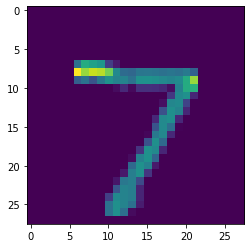

In [63]:
plt.imshow(x_test[0])
plt.show()

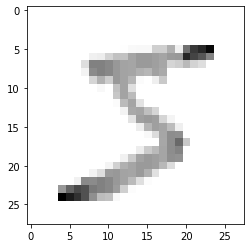

In [27]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
### Cats and dogs

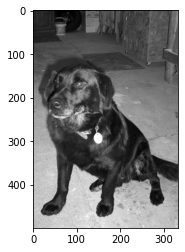

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = '/Users/jacob/Downloads/kagglecatsanddogs_3367a/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

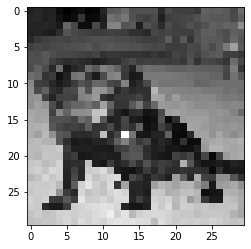

In [67]:
IMG_SIZE = 30

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [74]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()            

In [76]:
import random

random.shuffle(training_data)

In [78]:
X = []
y = []

In [79]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [81]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [97]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [98]:
X = X/255.0

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1,
         callbacks=[tensorboard])

Train on 22451 samples, validate on 2495 samples
Epoch 1/5
22451/22451 [==============================] - 33s 1ms/sample - loss: 0.6329 - accuracy: 0.6313 - val_loss: 0.5823 - val_accuracy: 0.6986
Epoch 2/5
22451/22451 [==============================] - 29s 1ms/sample - loss: 0.5374 - accuracy: 0.7316 - val_loss: 0.5440 - val_accuracy: 0.7271
Epoch 3/5
22451/22451 [==============================] - 32s 1ms/sample - loss: 0.4962 - accuracy: 0.7571 - val_loss: 0.4963 - val_accuracy: 0.7575
Epoch 4/5
22451/22451 [==============================] - 29s 1ms/sample - loss: 0.4678 - accuracy: 0.7784 - val_loss: 0.4890 - val_accuracy: 0.7575
Epoch 5/5
22451/22451 [==============================] - 36s 2ms/sample - loss: 0.4398 - accuracy: 0.7956 - val_loss: 0.4640 - val_accuracy: 0.7836


In [101]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [102]:
NAME = 'Cats-vs-dog-cnn-64x2-{}'.format(int(time.time()))

In [104]:
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [110]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = f'{conv_layer}-conv-{layer_size}-nodes-{dense_layer}-dense-{int(time.time())}'
            tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
            
            model = Sequential()
            
            model.add(Conv2D(layer_size, (3,3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
        
            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
                         optimizer='adam', 
                         metrics=['accuracy'])

            model.fit(X, y, batch_size=32, epochs=1, validation_split=0.1,
                     callbacks=[tensorboard])

Train on 22451 samples, validate on 2495 samples
22451/22451 [==============================] - 17s 764us/sample - loss: 0.6370 - accuracy: 0.6329 - val_loss: 0.6010 - val_accuracy: 0.6766
Train on 22451 samples, validate on 2495 samples
22451/22451 [==============================] - 26s 1ms/sample - loss: 0.6428 - accuracy: 0.6213 - val_loss: 0.5822 - val_accuracy: 0.7038
Train on 22451 samples, validate on 2495 samples
22451/22451 [==============================] - ETA: 0s - loss: 0.6417 - accuracy: 0.6221

KeyboardInterrupt: 